# Manuscript Figures: Electrochemical Characterization and Dataset Overview

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import sys
sys.path.append("../../")
import utils.data_utils as utils
import utils.data_vis as vis
from scipy.optimize import curve_fit
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

## Data loading

In [4]:
df_soh = pd.read_csv('../../data/targets_soh - manual volume and thickness edit.csv')
df_dcir = pd.read_csv('../../data/features_dcir.csv')

cell_id = df_soh['cell_id']
cell_type = [id[0] for id in cell_id]
temperature = df_soh['temperature_ambient']
capacity = df_soh['C/3 discharge capacity']
dcir = (df_dcir['charge_resistance_10s_1C_charging'] + df_dcir['discharge_resistance_10s_1C_charging'])/2
capacity_summary = {
    'cell_id': cell_id,
    'Cell Type': cell_type,
    'Temperature': temperature,
    'C/3 discharge capacity': capacity,
    'DCIR': dcir
}
capacity_summary = pd.DataFrame(capacity_summary)
capacity_summary.sort_values(by='Cell Type', inplace=True)

cell_type = ['A','B','C','D']
nominal_capacity = [65, 66, 26, 2.5]
for type, cap in zip(cell_type, nominal_capacity):
    mask = capacity_summary['Cell Type'] == type
    capacity_summary.loc[mask, 'Relative discharge capacity'] = capacity_summary['C/3 discharge capacity']/cap

capacity_summary.loc[capacity_summary['Temperature'] < 25, 'Ambient Temp.'] = '15'
capacity_summary.loc[capacity_summary['Temperature'] > 25, 'Ambient Temp.'] = '30'
capacity_summary.loc[capacity_summary['Temperature'] > 38, 'Ambient Temp.'] = '45'

capacity_summary

,cell_id,Cell Type,Temperature,C/3 discharge capacity,DCIR,Relative discharge capacity,Ambient Temp.
61,A_17,A,17.0,53.45,0.001684,0.822308,15
50,A_03,A,30.5,60.13,0.000756,0.925077,30
49,A_02,A,31.0,60.09,0.000764,0.924462,30
28,A_24,A,31.0,64.02,0.000771,0.984923,30
29,A_06,A,31.5,62.93,0.000766,0.968154,30
...,...,...,...,...,...,...,...
194,D_11,D,44.0,1.77,0.015435,0.708000,45
193,D_10,D,45.0,0.96,0.020640,0.384000,45
192,D_09,D,45.0,1.47,0.017635,0.588000,45
200,D_02,D,15.5,2.24,0.025066,0.896000,15


In [5]:
df_soh['Cell Type'] = [id[0] for id in df_soh['cell_id']]
df_soh.sort_values(by='Cell Type', inplace=True)

In [6]:
df_hppc = pd.read_csv('../../data/features_pulse_hppc.csv')
df_hppc = df_hppc[df_hppc['rate'] == '2C']
for measurement, capacity in zip(df_soh['measurement_id'], df_soh['C/3 discharge capacity']):
    df_hppc.loc[df_hppc['measurement_id'] == measurement, 'capacity'] = capacity

mask_current = ['current' in col for col in df_hppc.columns]
mask_voltage = ['voltage' in col for col in df_hppc.columns]

currents = df_hppc.loc[:, mask_current].to_numpy()
voltages = df_hppc.loc[:, mask_voltage].to_numpy()
currents_discharge = currents[:, 0:100]
currents_charge = currents[:, 500:600]
voltages_discharge = voltages[:, 0:100]
voltages_charge = voltages[:, 500:600]

overpotentials_charge = voltages_charge - np.expand_dims(voltages_charge[:,0], 1)
instantaneous_resistances_charge = overpotentials_charge / currents_charge
resistances_charge = np.max(instantaneous_resistances_charge, 1)

overpotentials_discharge = voltages_discharge - np.expand_dims(voltages_discharge[:,0], 1)
instantaneous_resistances_discharge = overpotentials_discharge / currents_discharge
resistances_discharge = np.max(instantaneous_resistances_discharge, 1)

resistance = np.mean(np.stack((resistances_discharge, resistances_charge)), 0)

df_hppc['resistance'] = resistance

cell_id = df_hppc['cell_id']
cell_type = [id[0] for id in cell_id]
temperature = df_hppc['temperature']
soc = df_hppc['soc']
resistance = df_hppc['resistance']
capacity = df_hppc['capacity']
hppc_summary = {
    'cell_id': cell_id,
    'Cell Type': cell_type,
    'Temperature': temperature,
    'State-of-charge': soc,
    'DCIR': resistance,
    'C/3 discharge capacity': capacity
}
hppc_summary = pd.DataFrame(hppc_summary)

cell_type = ['A','B','C','D']
nominal_capacity = [65, 66, 26, 2.5]
for type, cap in zip(cell_type, nominal_capacity):
    mask = hppc_summary['Cell Type'] == type
    hppc_summary.loc[mask, 'Relative discharge capacity'] = hppc_summary['C/3 discharge capacity']/cap

hppc_summary.loc[hppc_summary['Temperature'] < 25, 'Ambient Temp.'] = '15'
hppc_summary.loc[hppc_summary['Temperature'] > 25, 'Ambient Temp.'] = '30'
hppc_summary.loc[hppc_summary['Temperature'] > 38, 'Ambient Temp.'] = '45'

hppc_summary.sort_values(by=['Cell Type', 'Temperature'], inplace=True)
hppc_summary

C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_20340\3740410522.py:17: RuntimeWarning: invalid value encountered in divide
  instantaneous_resistances_charge = overpotentials_charge / currents_charge
C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_20340\3740410522.py:21: RuntimeWarning: invalid value encountered in divide
  instantaneous_resistances_discharge = overpotentials_discharge / currents_discharge


,cell_id,Cell Type,Temperature,State-of-charge,DCIR,C/3 discharge capacity,Relative discharge capacity,Ambient Temp.
2491,A_15,A,15.500000,0.005045,NaN,61.63,0.948154,15
2495,A_15,A,15.500000,0.127117,NaN,61.63,0.948154,15
2503,A_15,A,15.500000,0.331519,NaN,61.63,0.948154,15
2499,A_15,A,15.500832,0.229317,NaN,61.63,0.948154,15
2507,A_15,A,15.503328,0.433726,NaN,61.63,0.948154,15
...,...,...,...,...,...,...,...,...
14010,D_14,D,46.000832,0.084851,NaN,1.93,0.772000,45
13968,D_14,D,46.371048,0.719231,NaN,1.93,0.772000,45
13980,D_14,D,46.475042,1.004099,NaN,1.93,0.772000,45
13976,D_14,D,46.500000,0.955584,NaN,1.93,0.772000,45


## Figure 2: High-level dataset summary

C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


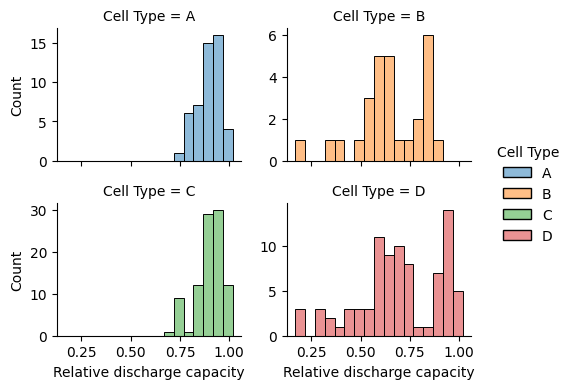

In [21]:
sns.displot(capacity_summary, x='Relative discharge capacity', hue='Cell Type', col='Cell Type',
            col_wrap=2, height=2, aspect=1.25, facet_kws={'sharey':False}, binwidth=0.05)

(0.0005, 0.1)

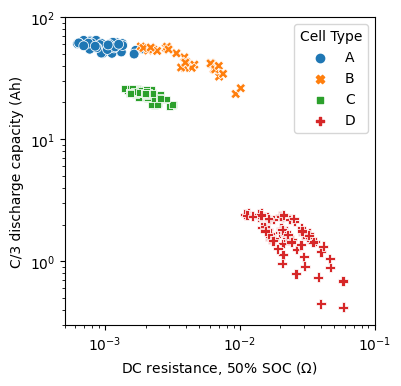

In [23]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
sns.scatterplot(capacity_summary, x='DCIR', y='C/3 discharge capacity', hue='Cell Type', style='Cell Type',
                ax=ax, s=50)
ax.set_xlabel(r'DC resistance, 50% SOC ($\Omega$)')
ax.set_ylabel('C/3 discharge capacity (Ah)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim((0.3, 100))
ax.set_xlim((5e-4, 1e-1))

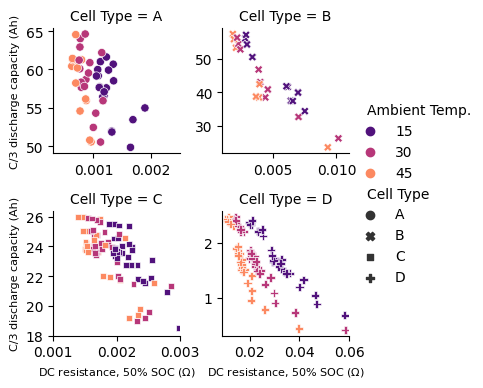

In [22]:
go = sns.relplot(capacity_summary,
                 x='DCIR', y='C/3 discharge capacity',
                 col='Cell Type', col_wrap=2,
                 hue='Ambient Temp.', palette='magma',
                 style='Cell Type', legend='brief',
                 height=2, facet_kws={'sharex':False, 'sharey':False})
# go.set(xscale='log')
go.axes[2].set_xlabel(r'DC resistance, 50% SOC ($\Omega$)', fontsize=8)
go.axes[3].set_xlabel(r'DC resistance, 50% SOC ($\Omega$)', fontsize=8)
go.axes[0].set_ylabel('C/3 discharge capacity (Ah)', fontsize=8)
go.axes[2].set_ylabel('C/3 discharge capacity (Ah)', fontsize=8)

go.axes[0].set_xlim([3e-4, 2.5e-3])
go.axes[1].set_xlim([1e-3, 1.1e-2])
go.axes[2].set_xlim([1e-3, 3e-3])
go.axes[3].set_xlim([9e-3, 6e-2])

go.axes[2].set_yticks([18, 20, 22, 24, 26])

## Figure 4: Absolute correlations between battery health targets and DCIR at 50% SOC

C:\Users\pgasper\AppData\Local\Temp\1\ipykernel_5064\3914683212.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.95, 1])


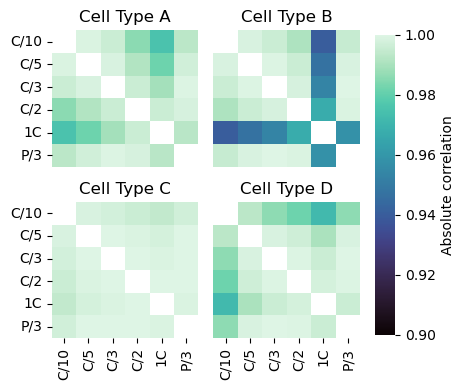

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(4,4))
ax = ax.ravel()
cax = fig.add_axes([0.95, 0.15, 0.05, 0.75]) 

vars = [
    'C/10 discharge capacity', 'C/5 discharge capacity',
    'C/3 discharge capacity', 'C/2 discharge capacity',
    '1C discharge capacity', 'P/3 discharge capacity'
    ]
labels = ['C/10', 'C/5', 'C/3', 'C/2', '1C', 'P/3']

for cell, axis in zip(df_soh['Cell Type'].unique(), ax):
    corr = df_soh.loc[df_soh['Cell Type'] == cell, vars].corr().abs()
    mask = np.zeros_like(corr)
    np.fill_diagonal(mask, 1)
    if cell == 'A':
       sns.heatmap(corr, xticklabels=[], yticklabels=labels, ax=axis, vmin=0.90, vmax=1, cbar=False, cmap='mako', mask=mask)
    elif cell == 'B':
       sns.heatmap(corr, xticklabels=[], yticklabels=[], ax=axis, vmin=0.90, vmax=1, cbar=False, cmap='mako', mask=mask)
    elif cell == 'C':
       sns.heatmap(corr, xticklabels=labels, yticklabels=labels, ax=axis, vmin=0.90, vmax=1, cbar=False, cmap='mako', mask=mask)
    else:
       sns.heatmap(corr, xticklabels=labels, yticklabels=[], ax=axis, vmin=0.90, vmax=1, cbar_ax=cax, cbar_kws={'label': 'Absolute correlation'}, cmap='mako', mask=mask)
    axis.set_title('Cell Type ' + cell)

plt.tight_layout(rect=[0, 0, 0.95, 1])


C:\Users\pgasper\AppData\Local\Temp\1\ipykernel_5064\3348461157.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.95, 1])


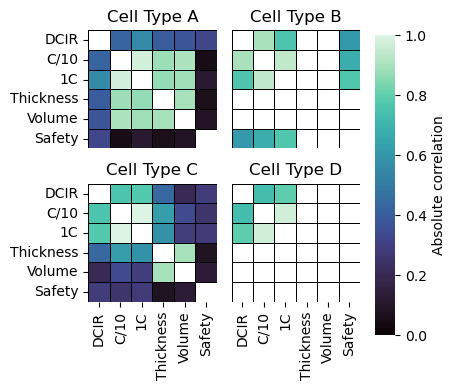

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(4,4))
ax = ax.ravel()
cax = fig.add_axes([0.95, 0.15, 0.05, 0.75]) 

df_soh['DCIR'] = capacity_summary['DCIR']
THRESHOLDS_1C = {
    "A": 3.6e-6,
    "B": 0.0000165,
    "C": 2.5e-06,
}
THRESHOLDS_C_2 = {
    "A": 3.6e-6,
    "B": 0.0000275,
    "C": 5.7e-06,
}
df_soh.loc[:,'Safety'] = None
for type, threhold_1C in THRESHOLDS_1C.items():
    threhold_Cb2 = THRESHOLDS_C_2[type]
    mask = df_soh['Cell Type'] == type
    df_soh.loc[mask, 'Safety'] = np.logical_or(df_soh.loc[mask, 'Post 1C charge relaxation fit MSE'] > threhold_1C, df_soh.loc[mask, 'Post C/2 charge relaxation fit MSE'] > threhold_Cb2)

vars = [
   'DCIR', 'C/10 discharge capacity', '1C discharge capacity',
   'Thickness growth', 'Volume growth', 'Safety'
    ]
labels = ['DCIR', 'C/10', '1C', 'Thickness', 'Volume', 'Safety']

for cell, axis in zip(df_soh['Cell Type'].unique(), ax):
    corr = df_soh.loc[df_soh['Cell Type'] == cell, vars].corr().abs()
    mask = np.zeros_like(corr)
    np.fill_diagonal(mask, 1)
    if cell == 'A':
       sns.heatmap(corr, xticklabels=[], yticklabels=labels, ax=axis, vmin=0, vmax=1, cbar=False, cmap='mako', mask=mask)
    elif cell == 'B':
       sns.heatmap(corr, xticklabels=[], yticklabels=[], ax=axis, vmin=0, vmax=1, cbar=False, cmap='mako', mask=mask)
    elif cell == 'C':
       sns.heatmap(corr, xticklabels=labels, yticklabels=labels, ax=axis, vmin=0, vmax=1, cbar=False, cmap='mako', mask=mask)
    else:
       sns.heatmap(corr, xticklabels=labels, yticklabels=[], ax=axis, vmin=0, vmax=1, cbar_ax=cax, cbar_kws={'label': 'Absolute correlation'}, cmap='mako', mask=mask)
    axis.set_title('Cell Type ' + cell)

plt.tight_layout(rect=[0, 0, 0.95, 1])

## Supplemental Figures

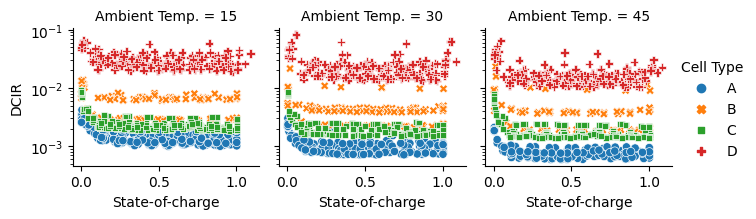

In [12]:
go = sns.relplot(hppc_summary, x='State-of-charge', y='DCIR', hue='Cell Type', style='Cell Type',
            col='Ambient Temp.', legend='brief',
            height=2.3, aspect=1, facet_kws={'sharey':True})
go.axes[0][0].set_yscale('log')
go.axes[0][1].set_yscale('log')
go.axes[0][2].set_yscale('log')

In [7]:
def plot_hppc(df, ylim=(0, 5), legend=True, title=None):
    fig, ax = plt.subplots(3,1, figsize=(2.7,5.9))
    ax = ax.ravel()
    out = utils.get_hppc_pulse_resistances(df)
    # aged cell, pulse rate
    out1a = out.loc[np.logical_and(np.logical_and(out['rate'] == 'C/10', ~out['is_voltage_limit_discharge']), ~out['is_voltage_limit_charge'])].reset_index().copy()
    out1b = out.loc[np.logical_and(np.logical_and(out['rate'] == 'C/2', ~out['is_voltage_limit_discharge']), ~out['is_voltage_limit_charge'])].reset_index().copy()
    out1c = out.loc[np.logical_and(np.logical_and(out['rate'] == '1C', ~out['is_voltage_limit_discharge']), ~out['is_voltage_limit_charge'])].reset_index().copy()
    out1d = out.loc[np.logical_and(np.logical_and(out['rate'] == '2C', ~out['is_voltage_limit_discharge']), ~out['is_voltage_limit_charge'])].reset_index().copy()
    ax[0].plot(out1a.loc[out1a['direction'] == 'discharge', 'soc'], out1a.loc[out1a['direction'] == 'discharge','discharge_resistance_10s']*1000, '--o', color='lightcoral', label='C/10 pulse')
    ax[0].plot(out1b.loc[out1b['direction'] == 'discharge', 'soc'], out1b.loc[out1b['direction'] == 'discharge','discharge_resistance_10s']*1000, '--o', color='indianred', label='C/2 pulse')
    ax[0].plot(out1c.loc[out1c['direction'] == 'discharge', 'soc'], out1c.loc[out1c['direction'] == 'discharge','discharge_resistance_10s']*1000, '--o', color='brown', label='1C pulse')
    ax[0].plot(out1d.loc[out1d['direction'] == 'discharge', 'soc'], out1d.loc[out1d['direction'] == 'discharge','discharge_resistance_10s']*1000, '--o', color='maroon', label='2C pulse')
    if legend: 
        ax[0].legend()
    ax[0].set_xticks([])
    ax[0].set_xlim((0,1))
    ax[0].set_ylim(ylim)
    ax[0].set_ylabel(r'DC resistance (m$\Omega$)')
    if title is not None:
        ax[0].set_title(title)

    # aged cell, direction hysteresis
    ax[1].plot(out1c.loc[out1c['direction'] == 'discharge', 'soc'], out1c.loc[out1c['direction'] == 'discharge','discharge_resistance_10s']*1000, '--d', color='tab:blue', label='On discharging')
    ax[1].plot(out1c.loc[out1c['direction'] == 'charge', 'soc'], out1c.loc[out1c['direction'] == 'charge','discharge_resistance_10s']*1000, '--d', color='tab:green', label='On charging')
    if legend:
        ax[1].legend()
    ax[1].set_xticks([])
    ax[1].set_xlim((0,1))
    ax[1].set_ylim(ylim)
    ax[1].set_ylabel(r'DC resistance (m$\Omega$)')

    # aged cell, pulse direction hysteresis
    ax[2].plot(out1c.loc[out1c['direction'] == 'discharge', 'soc'], out1c.loc[out1c['direction'] == 'discharge','discharge_resistance_10s']*1000, '--d', color='tab:purple', label='Discharge pulse')
    ax[2].plot(out1c.loc[out1c['direction'] == 'discharge', 'soc'], out1c.loc[out1c['direction'] == 'discharge','charge_resistance_10s']*1000, '--d', color='tab:cyan', label='Charge pulse')
    if legend:
        ax[2].legend()
    ax[2].set_xlabel('State of charge')
    ax[2].set_xlim((0,1))
    ax[2].set_ylim(ylim)
    ax[2].set_ylabel(r'DC resistance (m$\Omega$)')

    plt.tight_layout()

def get_df(idx):
    hdf = pd.HDFStore('../../data/data_raw.h5', mode='r')
    keys = hdf.keys()
    key = keys[idx] # pristine LG cell
    df = hdf.get(key)
    hdf.close()
    return df

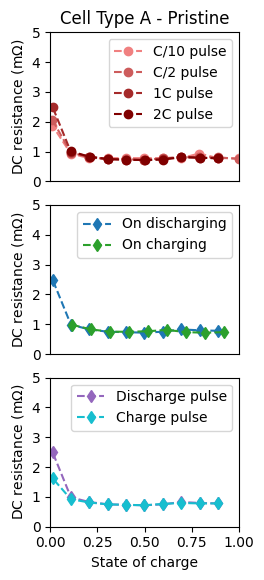

In [24]:
plot_hppc(get_df(28), title='Cell Type A - Pristine') # pristine A cell

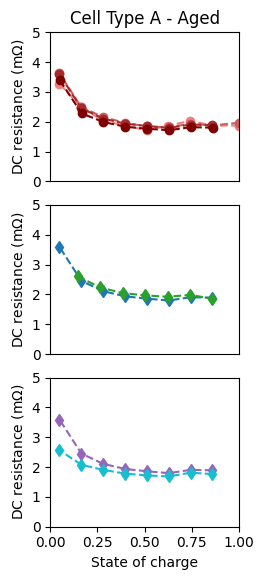

In [25]:
plot_hppc(get_df(62), legend=False, title='Cell Type A - Aged') # aged A cell

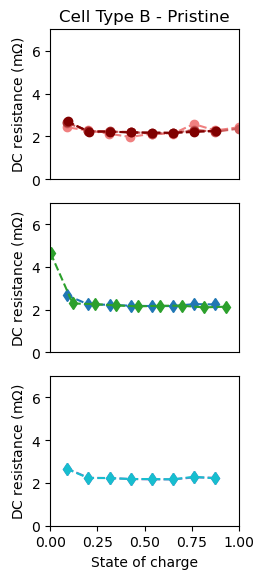

In [13]:
plot_hppc(get_df(16), ylim=(0,7), legend=False, title='Cell Type B - Pristine') # 'pristine' leaf cell

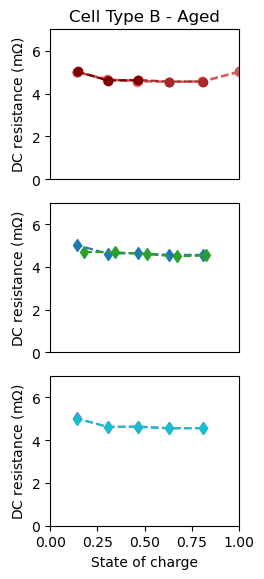

In [14]:
plot_hppc(get_df(0), ylim=(0,7), legend=False, title='Cell Type B - Aged') # aged leaf cell

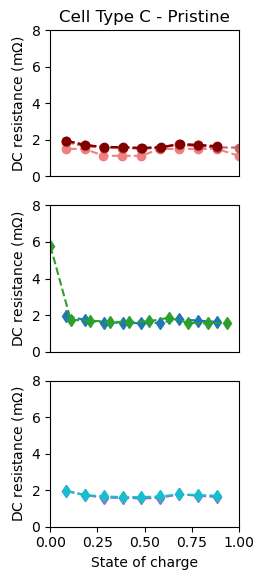

In [15]:
plot_hppc(get_df(77), ylim=(0,8), legend=False, title='Cell Type C - Pristine')

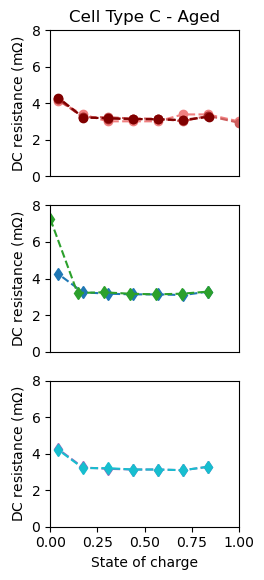

In [16]:
plot_hppc(get_df(164), ylim=(0,8), legend=False, title='Cell Type C - Aged')

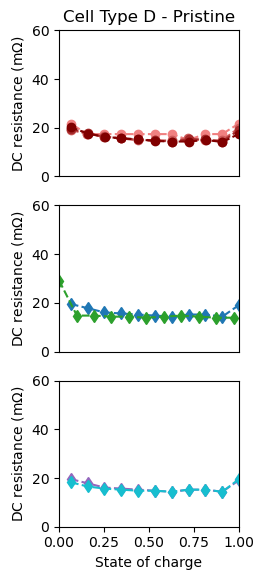

In [17]:
plot_hppc(get_df(182), ylim=(0,60), legend=False, title='Cell Type D - Pristine') # bol 182, eol 216

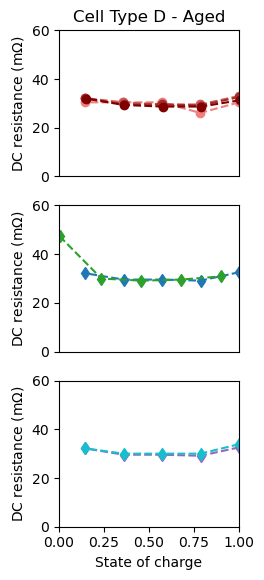

In [18]:
plot_hppc(get_df(216), ylim=(0,60), legend=False, title='Cell Type D - Aged')

C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='State-of-charge', ylabel='Count'>

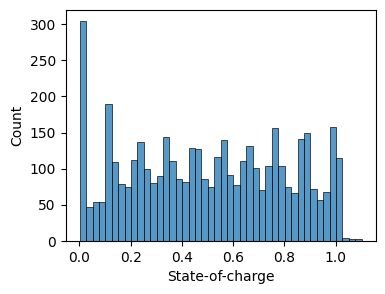

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
sns.histplot(hppc_summary, x='State-of-charge', binwidth=0.025, ax=ax)

C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([<matplotlib.axis.XTick at 0x2046c9a2f10>,
 [Text(15, 0, '15'), Text(30, 0, '30'), Text(45, 0, '45')])

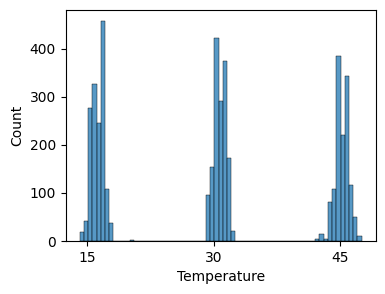

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
sns.histplot(hppc_summary, x='Temperature', binwidth=0.5, ax=ax)
plt.xticks([15, 30, 45])